# Fuzzy Deep Neural Network (FDNN) for Arrhythmia Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("MAINDiagnostics.csv")
df["Gender"] = df["Gender"].map({"MALE": 1, "FEMALE": 0})
df = df.drop(columns=["IDFILENAME", "FileName", "Beat"], errors='ignore')

# Create binary target
normal_group = ["SR", "SB", "ST", "SI", "SAAWR"]
arrhythmia_group = ["AFIB", "AF", "SVT", "AT", "AVNRT", "AVRT"]
df["Rhythm_Binary"] = df["Rhythm"].apply(lambda x: 0 if x in normal_group else (1 if x in arrhythmia_group else None))
df = df.dropna(subset=["Rhythm_Binary"])
y = df["Rhythm_Binary"].astype(int)
X = df.drop(columns=["Rhythm", "Rhythm_Binary"], errors='ignore')

# Save feature names
feature_names = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
input_dim = X_train.shape[1]


C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import FDNN as fd

# Train the model
model = fd.build_fdnn(input_dim)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)





Epoch 1/20


257/257 [==============================] - 1s 1ms/step - loss: 0.3926 - accuracy: 0.8066 - val_loss: 0.2928 - val_accuracy: 0.8751
Epoch 2/20
257/257 [==============================] - 0s 958us/step - loss: 0.3076 - accuracy: 0.8665 - val_loss: 0.2697 - val_accuracy: 0.8878
Epoch 3/20
257/257 [==============================] - 0s 997us/step - loss: 0.2887 - accuracy: 0.8778 - val_loss: 0.2597 - val_accuracy: 0.8937
Epoch 4/20
257/257 [==============================] - 0s 950us/step - loss: 0.2800 - accuracy: 0.8840 - val_loss: 0.2492 - val_accuracy: 0.9015
Epoch 5/20
257/257 [==============================] - 0s 962us/step - loss: 0.2748 - accuracy: 0.8893 - val_loss: 0.2449 - val_accuracy: 0.9029
Epoch 6/20
257/257 [==============================] - 0s 954us/step - loss: 0.2660 - accuracy: 0.8917 - val_loss: 0.2362 - val_accuracy: 0.9063
Epoch 7/20
257/257 [==============================] - 0s 958us/step - loss: 0.2553 - accuracy: 0.8962 - val_loss: 0.2350 - val_accurac

4/4 [==============================] - 0s 1ms/step


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

313/313 [==============================] - 0s 558us/step


  1%|▊                                                                                 | 1/100 [00:00<00:30,  3.24it/s]

313/313 [==============================] - 0s 585us/step


  2%|█▋                                                                                | 2/100 [00:00<00:29,  3.31it/s]

313/313 [==============================] - 0s 527us/step


  3%|██▍                                                                               | 3/100 [00:00<00:28,  3.39it/s]

313/313 [==============================] - 0s 518us/step


  4%|███▎                                                                              | 4/100 [00:01<00:27,  3.50it/s]

313/313 [==============================] - 0s 537us/step


  5%|████                                                                              | 5/100 [00:01<00:26,  3.54it/s]

313/313 [==============================] - 0s 537us/step


  6%|████▉                                                                             | 6/100 [00:01<00:26,  3.56it/s]

313/313 [==============================] - 0s 575us/step


  7%|█████▋                                                                            | 7/100 [00:02<00:26,  3.52it/s]

313/313 [==============================] - 0s 607us/step


  8%|██████▌                                                                           | 8/100 [00:02<00:26,  3.45it/s]

313/313 [==============================] - 0s 556us/step


  9%|███████▍                                                                          | 9/100 [00:02<00:26,  3.46it/s]

313/313 [==============================] - 0s 530us/step


 10%|████████                                                                         | 10/100 [00:02<00:25,  3.47it/s]

313/313 [==============================] - 0s 524us/step


 11%|████████▉                                                                        | 11/100 [00:03<00:25,  3.52it/s]

313/313 [==============================] - 0s 568us/step


 12%|█████████▋                                                                       | 12/100 [00:03<00:25,  3.50it/s]

313/313 [==============================] - 0s 530us/step


 13%|██████████▌                                                                      | 13/100 [00:03<00:24,  3.53it/s]

313/313 [==============================] - 0s 549us/step


 14%|███████████▎                                                                     | 14/100 [00:04<00:24,  3.53it/s]

313/313 [==============================] - 0s 533us/step


 15%|████████████▏                                                                    | 15/100 [00:04<00:24,  3.52it/s]

313/313 [==============================] - 0s 521us/step


 16%|████████████▉                                                                    | 16/100 [00:04<00:23,  3.56it/s]

313/313 [==============================] - 0s 533us/step


 17%|█████████████▊                                                                   | 17/100 [00:04<00:23,  3.59it/s]

313/313 [==============================] - 0s 521us/step


 18%|██████████████▌                                                                  | 18/100 [00:05<00:22,  3.62it/s]

313/313 [==============================] - 0s 527us/step


 19%|███████████████▍                                                                 | 19/100 [00:05<00:22,  3.56it/s]

313/313 [==============================] - 0s 546us/step


 20%|████████████████▏                                                                | 20/100 [00:05<00:22,  3.54it/s]

313/313 [==============================] - 0s 530us/step


 21%|█████████████████                                                                | 21/100 [00:05<00:22,  3.54it/s]

313/313 [==============================] - 0s 543us/step


 22%|█████████████████▊                                                               | 22/100 [00:06<00:21,  3.55it/s]

313/313 [==============================] - 0s 540us/step


 23%|██████████████████▋                                                              | 23/100 [00:06<00:21,  3.55it/s]

313/313 [==============================] - 0s 537us/step


 24%|███████████████████▍                                                             | 24/100 [00:06<00:21,  3.56it/s]

313/313 [==============================] - 0s 518us/step


 25%|████████████████████▎                                                            | 25/100 [00:07<00:20,  3.61it/s]

313/313 [==============================] - 0s 543us/step


 26%|█████████████████████                                                            | 26/100 [00:07<00:20,  3.60it/s]

313/313 [==============================] - 0s 530us/step


 27%|█████████████████████▊                                                           | 27/100 [00:07<00:20,  3.60it/s]

313/313 [==============================] - 0s 556us/step


 28%|██████████████████████▋                                                          | 28/100 [00:07<00:20,  3.59it/s]

313/313 [==============================] - 0s 546us/step


 29%|███████████████████████▍                                                         | 29/100 [00:08<00:19,  3.58it/s]

313/313 [==============================] - 0s 570us/step


 30%|████████████████████████▎                                                        | 30/100 [00:08<00:19,  3.56it/s]

313/313 [==============================] - 0s 537us/step


 31%|█████████████████████████                                                        | 31/100 [00:08<00:19,  3.56it/s]

313/313 [==============================] - 0s 530us/step


 32%|█████████████████████████▉                                                       | 32/100 [00:09<00:18,  3.59it/s]

313/313 [==============================] - 0s 546us/step


 33%|██████████████████████████▋                                                      | 33/100 [00:09<00:18,  3.58it/s]

313/313 [==============================] - 0s 521us/step


 34%|███████████████████████████▌                                                     | 34/100 [00:09<00:18,  3.57it/s]

313/313 [==============================] - 0s 556us/step


 35%|████████████████████████████▎                                                    | 35/100 [00:09<00:18,  3.56it/s]

313/313 [==============================] - 0s 514us/step


 36%|█████████████████████████████▏                                                   | 36/100 [00:10<00:17,  3.61it/s]

313/313 [==============================] - 0s 538us/step


 37%|█████████████████████████████▉                                                   | 37/100 [00:10<00:17,  3.60it/s]

313/313 [==============================] - 0s 514us/step


 38%|██████████████████████████████▊                                                  | 38/100 [00:10<00:16,  3.65it/s]

313/313 [==============================] - 0s 514us/step


 39%|███████████████████████████████▌                                                 | 39/100 [00:10<00:16,  3.67it/s]

313/313 [==============================] - 0s 511us/step


 40%|████████████████████████████████▍                                                | 40/100 [00:11<00:16,  3.71it/s]

313/313 [==============================] - 0s 546us/step


 41%|█████████████████████████████████▏                                               | 41/100 [00:11<00:16,  3.68it/s]

313/313 [==============================] - 0s 553us/step


 42%|██████████████████████████████████                                               | 42/100 [00:11<00:15,  3.63it/s]

313/313 [==============================] - 0s 569us/step


 43%|██████████████████████████████████▊                                              | 43/100 [00:12<00:15,  3.58it/s]

313/313 [==============================] - 0s 543us/step


 44%|███████████████████████████████████▋                                             | 44/100 [00:12<00:15,  3.56it/s]

313/313 [==============================] - 0s 540us/step


 45%|████████████████████████████████████▍                                            | 45/100 [00:12<00:15,  3.54it/s]

313/313 [==============================] - 0s 529us/step


 46%|█████████████████████████████████████▎                                           | 46/100 [00:12<00:15,  3.56it/s]

313/313 [==============================] - 0s 571us/step


 47%|██████████████████████████████████████                                           | 47/100 [00:13<00:15,  3.53it/s]

313/313 [==============================] - 0s 575us/step


 48%|██████████████████████████████████████▉                                          | 48/100 [00:13<00:15,  3.46it/s]

313/313 [==============================] - 0s 575us/step


 49%|███████████████████████████████████████▋                                         | 49/100 [00:13<00:14,  3.46it/s]

313/313 [==============================] - 0s 606us/step


 50%|████████████████████████████████████████▌                                        | 50/100 [00:14<00:14,  3.43it/s]

313/313 [==============================] - 0s 534us/step


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:14<00:14,  3.48it/s]

313/313 [==============================] - 0s 529us/step


 52%|██████████████████████████████████████████                                       | 52/100 [00:14<00:13,  3.53it/s]

313/313 [==============================] - 0s 538us/step


 53%|██████████████████████████████████████████▉                                      | 53/100 [00:14<00:13,  3.54it/s]

313/313 [==============================] - 0s 555us/step


 54%|███████████████████████████████████████████▋                                     | 54/100 [00:15<00:12,  3.55it/s]

313/313 [==============================] - 0s 561us/step


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:15<00:12,  3.54it/s]

313/313 [==============================] - 0s 563us/step


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:15<00:12,  3.52it/s]

313/313 [==============================] - 0s 524us/step


 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:16<00:12,  3.57it/s]

313/313 [==============================] - 0s 538us/step


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:16<00:11,  3.55it/s]

313/313 [==============================] - 0s 567us/step


 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:16<00:11,  3.51it/s]

313/313 [==============================] - 0s 520us/step


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:16<00:11,  3.56it/s]

313/313 [==============================] - 0s 530us/step


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:17<00:10,  3.59it/s]

313/313 [==============================] - 0s 527us/step


 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:17<00:10,  3.61it/s]

313/313 [==============================] - 0s 524us/step


 63%|███████████████████████████████████████████████████                              | 63/100 [00:17<00:10,  3.62it/s]

313/313 [==============================] - 0s 527us/step


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:18<00:11,  3.26it/s]

313/313 [==============================] - 0s 530us/step


 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:18<00:10,  3.37it/s]

313/313 [==============================] - 0s 533us/step


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:18<00:09,  3.45it/s]

313/313 [==============================] - 0s 537us/step


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:18<00:09,  3.51it/s]

313/313 [==============================] - 0s 541us/step


 68%|███████████████████████████████████████████████████████                          | 68/100 [00:19<00:09,  3.53it/s]

313/313 [==============================] - 0s 525us/step


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:19<00:08,  3.56it/s]

313/313 [==============================] - 0s 524us/step


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:19<00:08,  3.57it/s]

313/313 [==============================] - 0s 530us/step


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:20<00:08,  3.59it/s]

313/313 [==============================] - 0s 526us/step


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:20<00:07,  3.62it/s]

313/313 [==============================] - 0s 528us/step


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:20<00:07,  3.63it/s]

313/313 [==============================] - 0s 521us/step


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:20<00:07,  3.63it/s]

313/313 [==============================] - 0s 530us/step


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:21<00:06,  3.65it/s]

313/313 [==============================] - 0s 539us/step


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:21<00:06,  3.64it/s]

313/313 [==============================] - 0s 587us/step


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:21<00:06,  3.55it/s]

313/313 [==============================] - 0s 552us/step


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:21<00:06,  3.55it/s]

313/313 [==============================] - 0s 537us/step


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:22<00:05,  3.59it/s]

313/313 [==============================] - 0s 546us/step


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:22<00:05,  3.61it/s]

313/313 [==============================] - 0s 532us/step


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:22<00:05,  3.62it/s]

313/313 [==============================] - 0s 527us/step


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:23<00:04,  3.64it/s]

313/313 [==============================] - 0s 523us/step


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:23<00:04,  3.66it/s]

313/313 [==============================] - 0s 541us/step


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:23<00:04,  3.66it/s]

313/313 [==============================] - 0s 530us/step


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:23<00:04,  3.67it/s]

313/313 [==============================] - 0s 520us/step


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:24<00:03,  3.67it/s]

313/313 [==============================] - 0s 530us/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:24<00:03,  3.65it/s]

313/313 [==============================] - 0s 517us/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:24<00:03,  3.67it/s]

313/313 [==============================] - 0s 542us/step


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:24<00:03,  3.64it/s]

313/313 [==============================] - 0s 524us/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:25<00:02,  3.66it/s]

313/313 [==============================] - 0s 533us/step


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:25<00:02,  3.66it/s]

313/313 [==============================] - 0s 527us/step


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:25<00:02,  3.67it/s]

313/313 [==============================] - 0s 525us/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:26<00:01,  3.67it/s]

313/313 [==============================] - 0s 532us/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:26<00:01,  3.64it/s]

313/313 [==============================] - 0s 554us/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:26<00:01,  3.62it/s]

313/313 [==============================] - 0s 558us/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:26<00:01,  3.58it/s]

313/313 [==============================] - 0s 540us/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:27<00:00,  3.59it/s]

313/313 [==============================] - 0s 530us/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:27<00:00,  3.60it/s]

313/313 [==============================] - 0s 571us/step


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:27<00:00,  3.55it/s]

313/313 [==============================] - 0s 552us/step


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.57it/s]


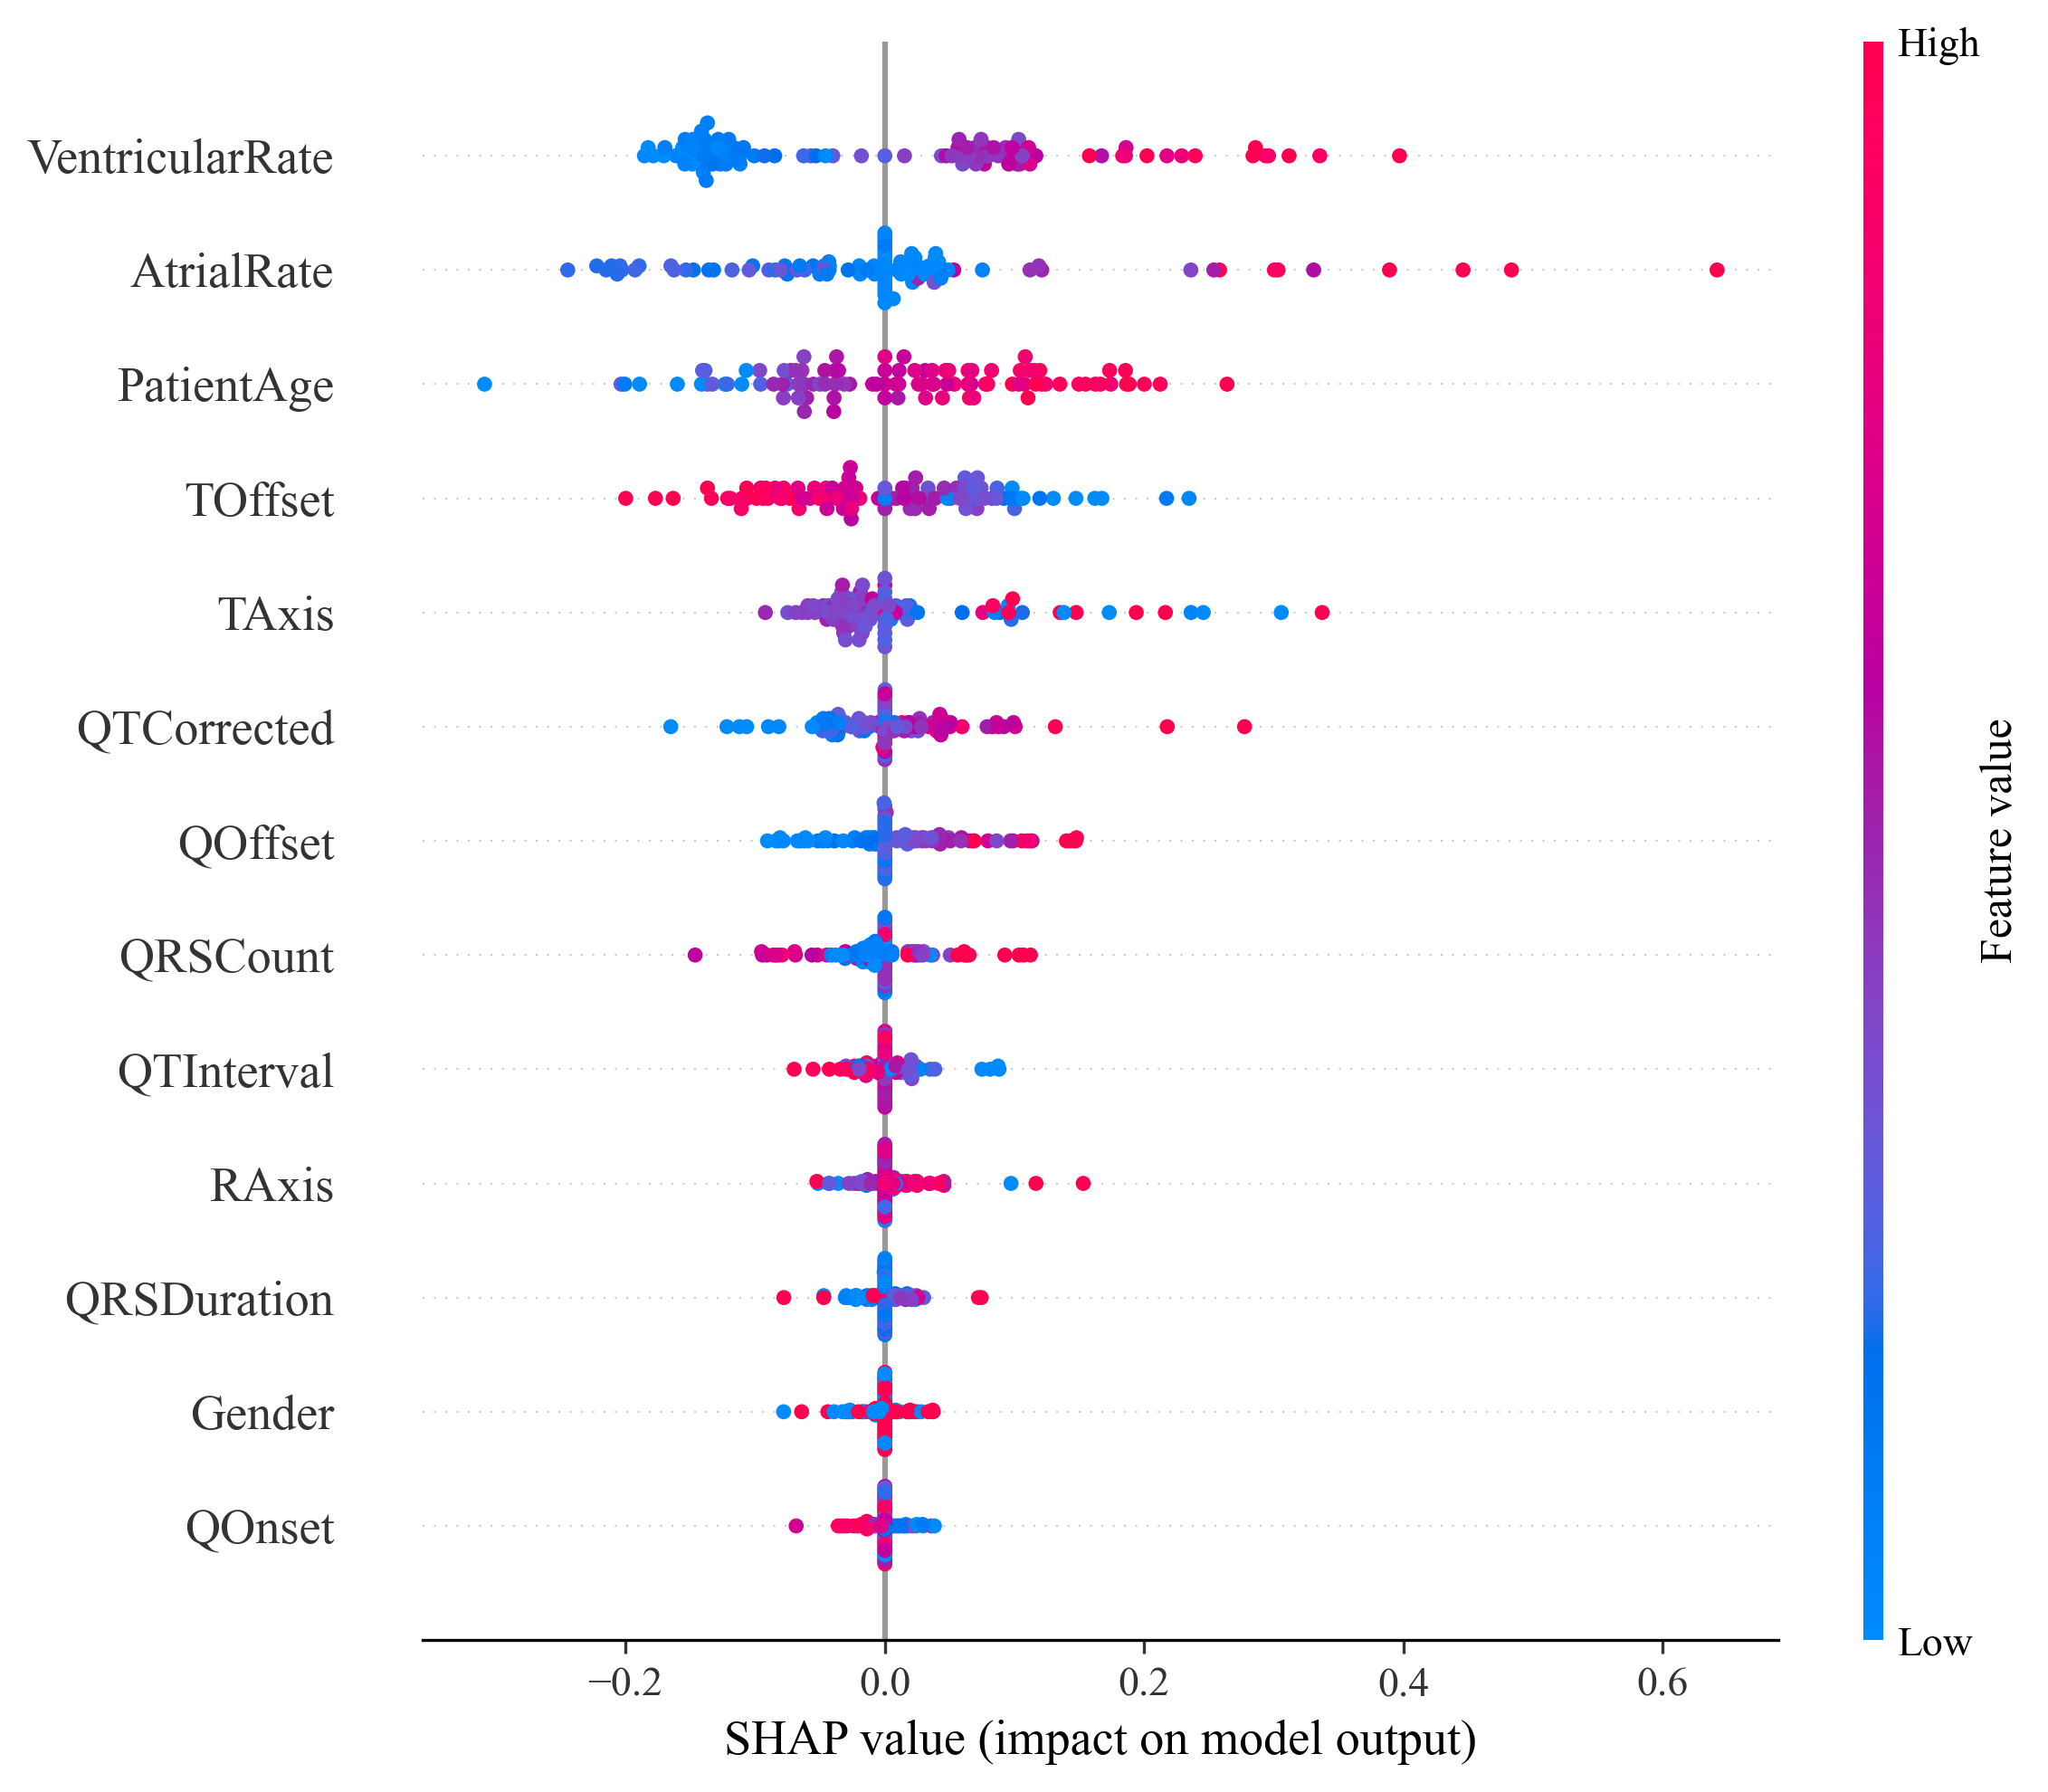

In [3]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Set font to Times New Roman for all plots
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Define a wrapper that returns only the probability of class 1 (Arrhythmia)
def predict_class1(X):
    preds = model.predict(X)
    return preds[:, 1]  # Return only class 1 probability

# Select 100 samples from training data as background
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Select 100 validation samples to explain
X_val_sample = X_val[:100]

# Create SHAP KernelExplainer using the wrapped prediction function
explainer = shap.KernelExplainer(predict_class1, background)

# Compute SHAP values for the validation sample
shap_values = explainer.shap_values(X_val_sample, nsamples=100)

# Plot summary plot (high resolution, Times New Roman font)
plt.figure(figsize=(10, 6), dpi=300)  # High DPI for better quality
shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names, show=False)
plt.tight_layout()
plt.savefig("shap_summary_arrhythmia_highres.png", dpi=300)
plt.show()


65/65 [==============================] - 0s 529us/step


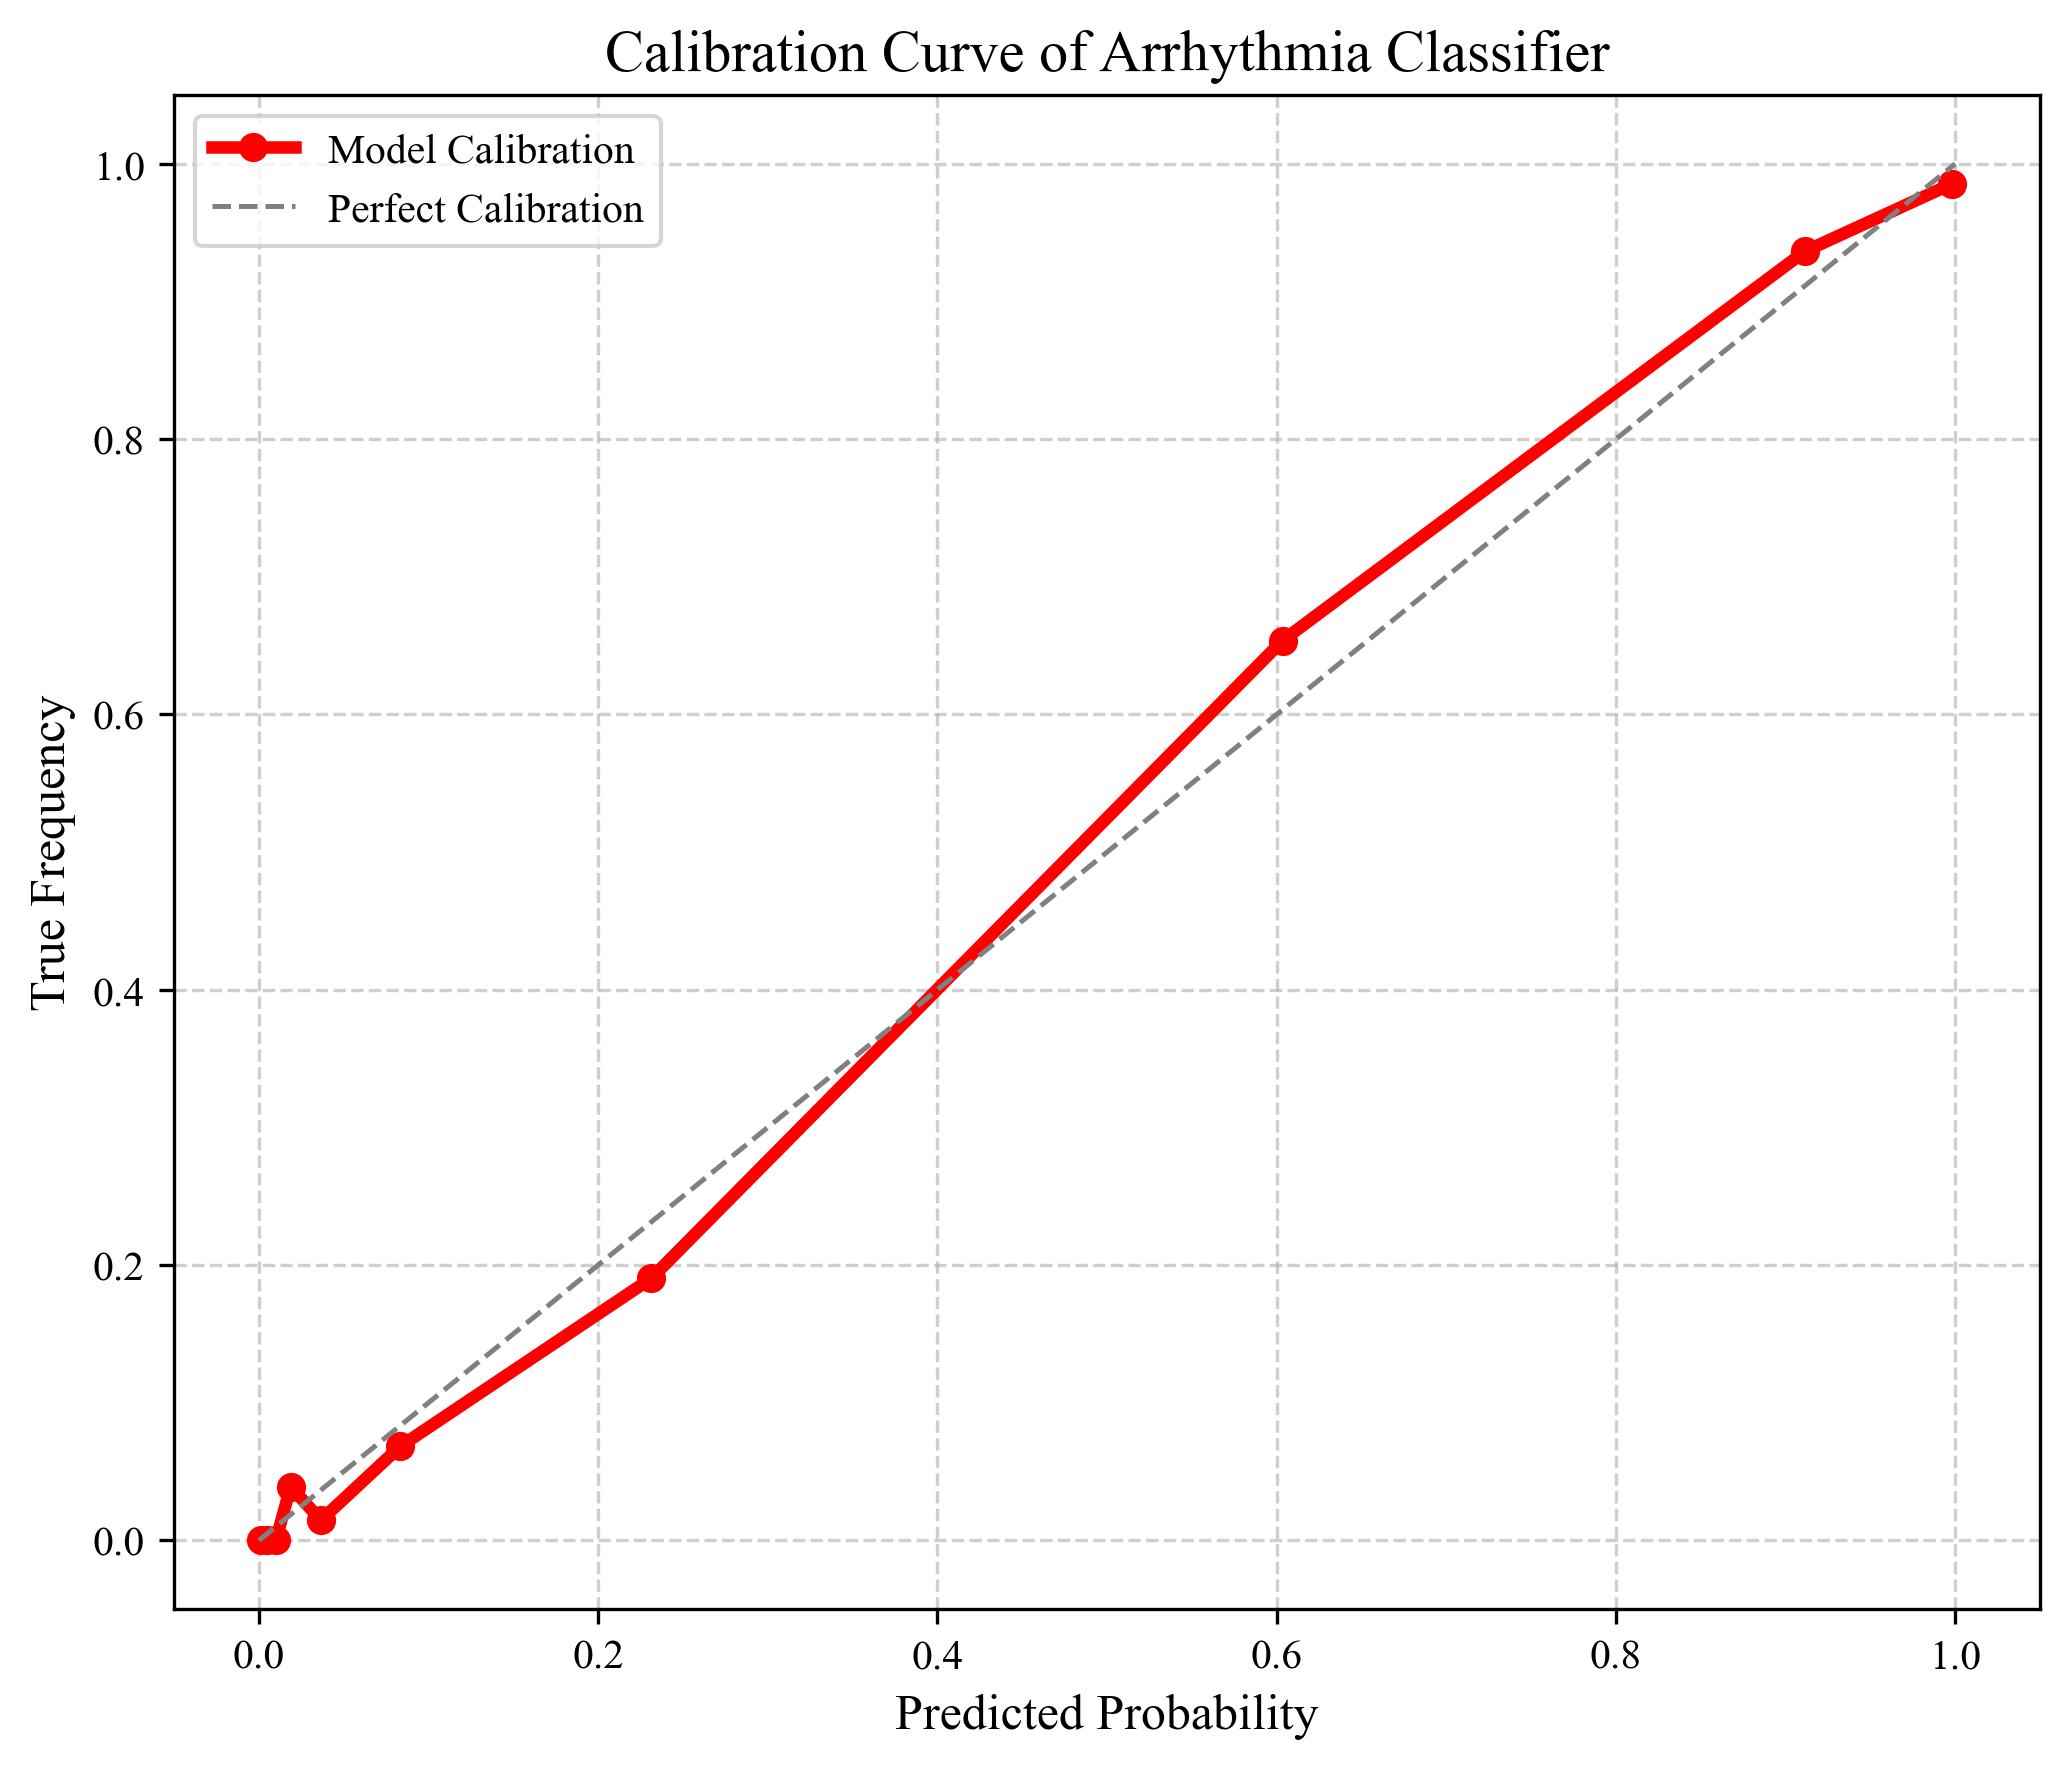

In [4]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Set font globally
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Predict class 1 probabilities
y_prob = model.predict(X_val)[:, 1]

# Compute calibration data
prob_true, prob_pred = calibration_curve(y_val, y_prob, n_bins=10, strategy='quantile')

# Plot
plt.figure(figsize=(7, 6), dpi=300)

# Model calibration curve: red and thick
plt.plot(prob_pred, prob_true, marker='o', color='red', linewidth=3, label='Model Calibration')

# Perfect calibration line: gray and thin
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.2, label='Perfect Calibration')

# Labels and title
plt.xlabel('Predicted Probability', fontsize=12, fontname='Times New Roman')
plt.ylabel('True Frequency', fontsize=12, fontname='Times New Roman')
plt.title('Calibration Curve of Arrhythmia Classifier', fontsize=14, fontname='Times New Roman')

# Legend and grid
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("calibration_curve_arrhythmia_final.png", dpi=300)
plt.show()


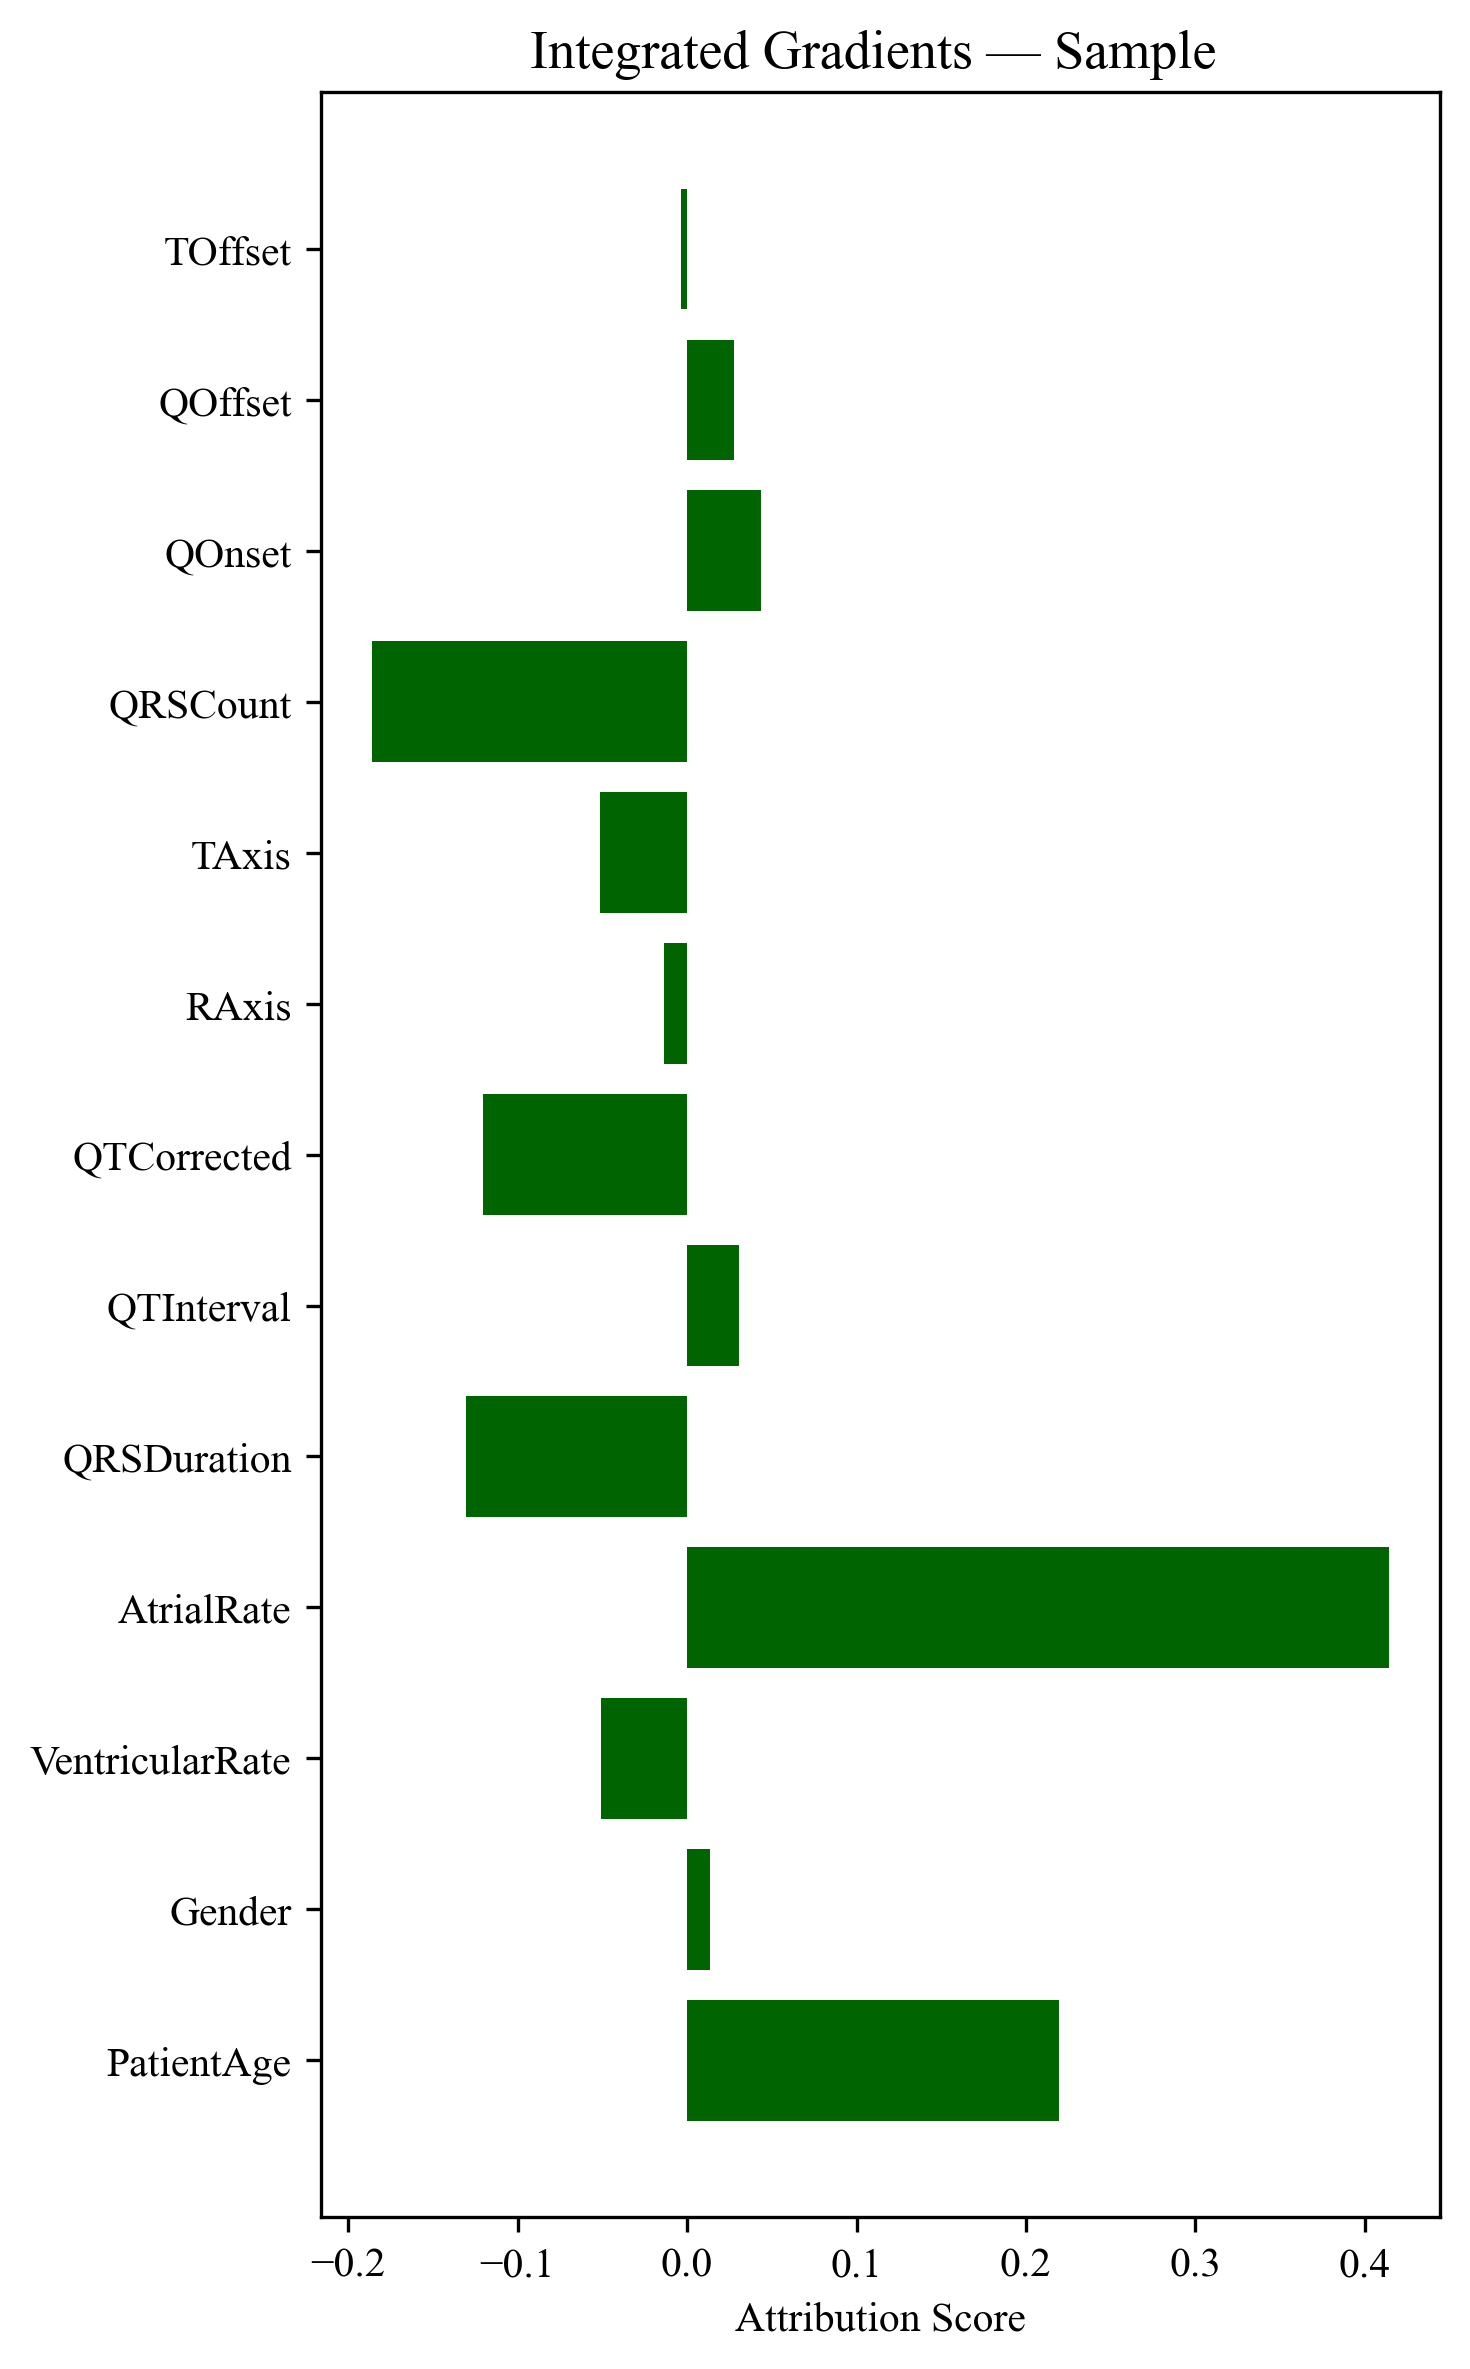

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Set font
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Define Integrated Gradients
def integrated_gradients(model, x_input, baseline=None, steps=50):
    if baseline is None:
        baseline = tf.zeros_like(x_input)
    
    interpolated = [baseline + (float(i) / steps) * (x_input - baseline) for i in range(steps + 1)]
    interpolated = tf.concat(interpolated, axis=0)  # Shape: (steps+1, features)

    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        preds = model(interpolated)
        probs = preds[:, 1]  # class 1 (Arrhythmia)
    
    grads = tape.gradient(probs, interpolated)
    avg_grads = tf.reduce_mean(grads, axis=0)
    ig = (x_input[0] - baseline[0]) * avg_grads
    return ig.numpy()

# Select sample
i = 12
x = tf.convert_to_tensor([X_val[i]], dtype=tf.float32)

# Compute IG
ig_values = integrated_gradients(model, x)

# Plot vertical bar chart
plt.figure(figsize=(5, 8), dpi=300)
plt.barh(feature_names, ig_values, color='darkgreen')
plt.xlabel("Attribution Score", fontname='Times New Roman')
plt.title(f'Integrated Gradients — Sample ', fontname='Times New Roman', fontsize=13)
plt.tight_layout()
plt.savefig("integrated_gradients_vertical.png", dpi=300)
plt.show()
